In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/track-2-audio-identification-quest.zip'

In [ ]:
import zipfile

# Define the path to the zip file and the extraction directory
zip_file_path = '/content/drive/MyDrive/track-2-audio-identification-quest.zip'
extraction_dir = '/content/track-2-audio-identification-quest'

# Create the extraction directory if it doesn't exist
import os
os.makedirs(extraction_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f"Files extracted to {extraction_dir}")


Files extracted to /content/track-2-audio-identification-quest


# From here

In [ ]:
import os
import pandas as pd

# Define the directory containing the files
directory = '/content/track-2-audio-identification-quest/training_split/training_split'

# Create a list to store all file paths
file_paths = []

# Walk through the directory and get all file paths
for root, dirs, files in os.walk(directory):
    for file in files:
        file_paths.append(os.path.join(root, file))

# Create a DataFrame with the file paths
df = pd.DataFrame(file_paths, columns=['filepath'])

# Display the DataFrame
print(df)
df.shape


                                                                                                         filepath
0       /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_6.wav
1       /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_1.wav
2       /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_0.wav
3       /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_3.wav
4       /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_5.wav
...                                                                                                           ...
1448  /content/track-2-audio-identification-quest/training_split/training_split/196_43_female/196_43_female_0.wav
1449  /content/track-2-audio-identification-quest/training_split/training_split/196_43_f

(1453, 1)

In [ ]:
pd.set_option('display.max_colwidth', None)
print(df['filepath'])

0         /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_6.wav
1         /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_1.wav
2         /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_0.wav
3         /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_3.wav
4         /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_5.wav
                                                           ...                                                     
1448    /content/track-2-audio-identification-quest/training_split/training_split/196_43_female/196_43_female_0.wav
1449    /content/track-2-audio-identification-quest/training_split/training_split/196_43_female/196_43_female_3.wav
1450    /content/track-2-audio-identification-quest/training_split/train

In [ ]:
df.head()

,filepath
0,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_6.wav
1,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_1.wav
2,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_0.wav
3,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_3.wav
4,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_5.wav


In [ ]:
import re
def extract_age(filepath):
    match = re.search(r'_(\d{2})_', filepath)  # Regular expression to find two-digit age
    if match:
        return int(match.group(1))
    return None  # Return None if no match is found

# Apply the function to the 'filepath' column
df['age_group'] = df['filepath'].apply(extract_age)


In [ ]:
df.head()

,filepath,age_group
0,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_6.wav,30
1,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_1.wav,30
2,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_0.wav,30
3,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_3.wav,30
4,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_5.wav,30


In [ ]:
df.shape

(1453, 2)

In [ ]:
df['age_group'].unique()

array([30, 26, 23, 19, 25, 42, 38, 41, 22, 20, 70, 27, 32, 74, 50, 65, 47,
       36, 66, 21, 55, 29, 24, 16, 43, 51, 31, 60, 37, 64, 53, 18, 59, 48,
       52, 28, 56, 35, 63, 76, 58, 39, 44, 77, 33, 68, 57, 73, 81, 75, 40,
       80, 45])

In [ ]:
def classify_age(age):
    if age <= 15:
        return 0
    elif 16 <= age <= 40:
        return 1
    else:
        return 2

df['age_group'] = df['age_group'].apply(classify_age)

In [ ]:
df['age_group'].value_counts()

,count
age_group,
1,1113
2,340


In [ ]:
# Function to extract the word before the last underscore
def extract_word_before_last_underscore(filepath):
    # Split the filename by underscores and take the second-to-last element
    return filepath.split('/')[-1].split('_')[-2]

# Apply the function to the 'filepath' column
df['Gender'] = df['filepath'].apply(extract_word_before_last_underscore)

In [ ]:
df.head()

,filepath,age_group,Gender
0,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_6.wav,1,female
1,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_1.wav,1,female
2,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_0.wav,1,female
3,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_3.wav,1,female
4,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_5.wav,1,female


In [ ]:
df['Gender'] = df['Gender'].replace({'male': 0, 'female': 1})

In [ ]:
df.head()

,filepath,age_group,Gender
0,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_6.wav,1,1
1,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_1.wav,1,1
2,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_0.wav,1,1
3,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_3.wav,1,1
4,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_5.wav,1,1


In [ ]:
df['Gender'].value_counts()

,count
Gender,
0,1034
1,414
feamle,5


In [ ]:
df['Gender'] = df['Gender'].replace('feamle', 'female')

In [ ]:
df['Gender'].value_counts()

,count
Gender,
0,1034
1,414
female,5


In [ ]:
import soundfile as sf

# Filepath to the .wav file
filepath = '/content/track-2-audio-identification-quest/training_split/training_split/113_81_male/113_81_male_0.wav'

# Read and play the .wav file
data, samplerate = sf.read(filepath)
print(f"Sample rate: {samplerate}, Data shape: {data.shape}")


Sample rate: 44100, Data shape: (441000,)


In [ ]:
df.shape

(1453, 3)

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from IPython.display import Audio

#file_path = "/content/km_kh_male/wavs/khm_0308_0011865648.wav"
file_path = df['filepath'].iloc[0]
audio = Audio(file_path)
audio

In [ ]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(df.filepath)[1]
data, sample_rate = librosa.load(path)

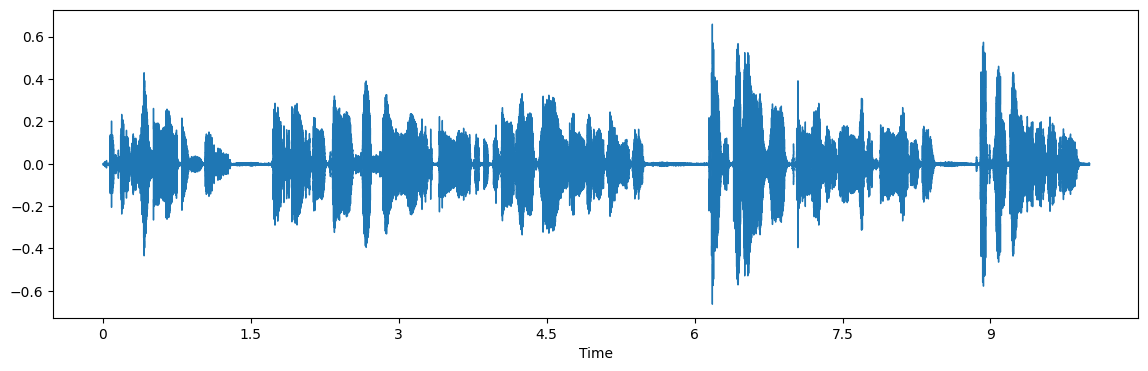

In [ ]:
#Simple Audio
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

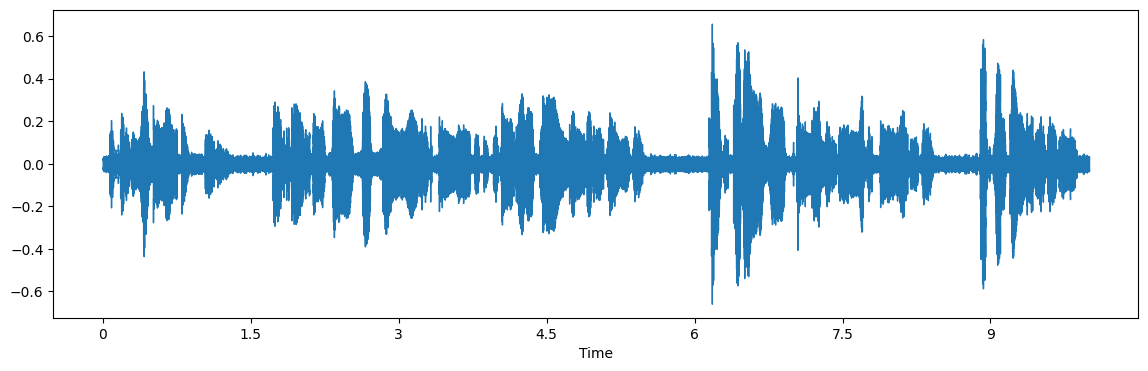

In [ ]:
#noise injection
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

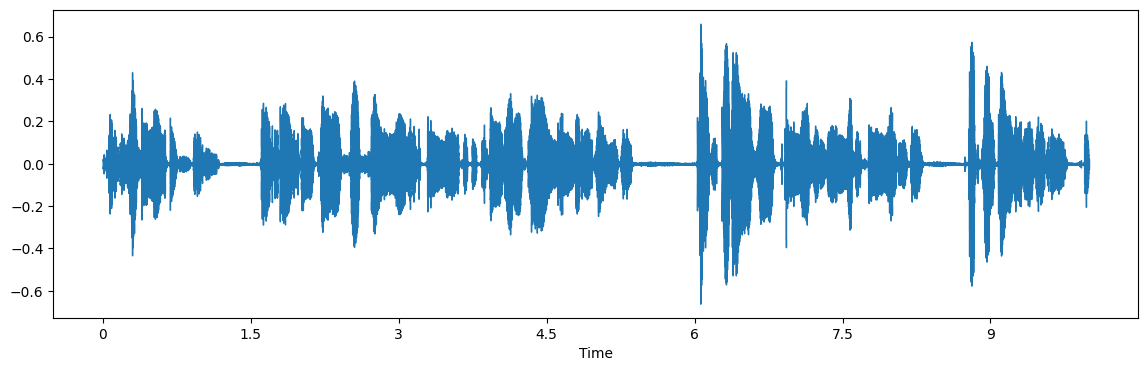

In [ ]:
#shifting
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
def extract_features(data, sample_rate):
    # ZCR
    result = np.array([])
    #zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    #result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square Value
    #rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    #result = np.hstack((result, rms))  # stacking horizontally

    # MelSpectogram
    #mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    #result = np.hstack((result, mel))  # stacking horizontally

    return result


def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    result = extract_features(data, sample_rate)
    return result


In [ ]:
X, Y = [], []
for path, emotion in zip(df.filepath, df.Gender):
    feature = get_features(path)
    X.append(feature)
    Y.append(emotion)


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,labels
0,0.543603,0.524532,0.536776,0.546942,0.487833,0.464243,0.526504,0.544224,0.593201,0.573245,...,-11.382232,-11.893994,-11.918550,-16.960222,-12.736818,-8.349803,-10.214372,-14.713948,-8.402382,1
1,0.563215,0.532220,0.504225,0.524509,0.554578,0.506521,0.521162,0.547267,0.538395,0.639460,...,-19.062618,-6.621463,-18.291700,-17.075491,-14.728558,-9.614551,-15.574316,-14.268152,-8.377122,1
2,0.708792,0.620726,0.613388,0.605240,0.546282,0.487333,0.496360,0.584300,0.705471,0.699229,...,-10.360657,-1.636995,-11.402393,-10.318789,-15.638175,-2.815149,-11.994090,-8.516578,-7.247018,1
3,0.598584,0.505337,0.498281,0.496816,0.456440,0.491472,0.500601,0.550101,0.591470,0.605946,...,-16.359343,-1.486079,-10.760049,-14.581850,-17.740978,-4.951878,-9.681317,-11.731129,-7.063040,1
4,0.548506,0.557451,0.554956,0.619390,0.492157,0.436431,0.491573,0.498088,0.608048,0.642067,...,-9.725639,-8.103970,-12.294300,-17.378433,-15.945672,-8.017616,-12.215864,-18.169168,-6.408453,1


In [ ]:
Features.shape

(1453, 33)

In [ ]:
df_combined = pd.concat([df, Features], axis=1)

print(df_combined)

                                                                                                         filepath  \
0       /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_6.wav   
1       /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_1.wav   
2       /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_0.wav   
3       /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_3.wav   
4       /content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_5.wav   
...                                                                                                           ...   
1448  /content/track-2-audio-identification-quest/training_split/training_split/196_43_female/196_43_female_0.wav   
1449  /content/track-2-audio-identification-quest/training_split

In [ ]:
df_combined.head()

,filepath,age_group,Gender,0,1,2,3,4,5,6,...,23,24,25,26,27,28,29,30,31,labels
0,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_6.wav,1,1,0.543603,0.524532,0.536776,0.546942,0.487833,0.464243,0.526504,...,-11.382232,-11.893994,-11.918550,-16.960222,-12.736818,-8.349803,-10.214372,-14.713948,-8.402382,1
1,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_1.wav,1,1,0.563215,0.532220,0.504225,0.524509,0.554578,0.506521,0.521162,...,-19.062618,-6.621463,-18.291700,-17.075491,-14.728558,-9.614551,-15.574316,-14.268152,-8.377122,1
2,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_0.wav,1,1,0.708792,0.620726,0.613388,0.605240,0.546282,0.487333,0.496360,...,-10.360657,-1.636995,-11.402393,-10.318789,-15.638175,-2.815149,-11.994090,-8.516578,-7.247018,1
3,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_3.wav,1,1,0.598584,0.505337,0.498281,0.496816,0.456440,0.491472,0.500601,...,-16.359343,-1.486079,-10.760049,-14.581850,-17.740978,-4.951878,-9.681317,-11.731129,-7.063040,1
4,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_5.wav,1,1,0.548506,0.557451,0.554956,0.619390,0.492157,0.436431,0.491573,...,-9.725639,-8.103970,-12.294300,-17.378433,-15.945672,-8.017616,-12.215864,-18.169168,-6.408453,1


In [ ]:
df_combined.to_csv('combined.csv')

In [ ]:
df_combined['age_group'].value_counts()

,count
age_group,
1,1113
2,340


In [ ]:
df_combined['Gender'].value_counts()

,count
Gender,
0,1034
1,414
female,5


In [ ]:
df_combined.to_csv("traindata.csv")

In [ ]:
df_combined.isnull().sum()

,0
filepath,0
age_group,0
Gender,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


In [ ]:
print(df['age_group'].dtype)

int64


In [ ]:
print(df['Gender'].dtype)

object


In [ ]:
print(df['age_group'].dtype)

int64


In [ ]:
df['age_group'] = df['age_group'].astype(int)

In [ ]:
df=df_combined.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   filepath   1453 non-null   object 
 1   age_group  1453 non-null   int64  
 2   Gender     1453 non-null   object 
 3   0          1453 non-null   float64
 4   1          1453 non-null   float64
 5   2          1453 non-null   float64
 6   3          1453 non-null   float64
 7   4          1453 non-null   float64
 8   5          1453 non-null   float64
 9   6          1453 non-null   float64
 10  7          1453 non-null   float64
 11  8          1453 non-null   float64
 12  9          1453 non-null   float64
 13  10         1453 non-null   float64
 14  11         1453 non-null   float64
 15  12         1453 non-null   float64
 16  13         1453 non-null   float64
 17  14         1453 non-null   float64
 18  15         1453 non-null   float64
 19  16         1453 non-null   float64
 20  17      

In [ ]:
df.head()

,filepath,age_group,Gender,0,1,2,3,4,5,6,...,23,24,25,26,27,28,29,30,31,labels
0,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_6.wav,1,1,0.543603,0.524532,0.536776,0.546942,0.487833,0.464243,0.526504,...,-11.382232,-11.893994,-11.918550,-16.960222,-12.736818,-8.349803,-10.214372,-14.713948,-8.402382,1
1,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_1.wav,1,1,0.563215,0.532220,0.504225,0.524509,0.554578,0.506521,0.521162,...,-19.062618,-6.621463,-18.291700,-17.075491,-14.728558,-9.614551,-15.574316,-14.268152,-8.377122,1
2,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_0.wav,1,1,0.708792,0.620726,0.613388,0.605240,0.546282,0.487333,0.496360,...,-10.360657,-1.636995,-11.402393,-10.318789,-15.638175,-2.815149,-11.994090,-8.516578,-7.247018,1
3,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_3.wav,1,1,0.598584,0.505337,0.498281,0.496816,0.456440,0.491472,0.500601,...,-16.359343,-1.486079,-10.760049,-14.581850,-17.740978,-4.951878,-9.681317,-11.731129,-7.063040,1
4,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_5.wav,1,1,0.548506,0.557451,0.554956,0.619390,0.492157,0.436431,0.491573,...,-9.725639,-8.103970,-12.294300,-17.378433,-15.945672,-8.017616,-12.215864,-18.169168,-6.408453,1


In [ ]:
df.to_csv('train.csv')

In [ ]:
df['age_group'].value_counts()

,count
age_group,
1,1113
2,340


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   filepath   1453 non-null   object 
 1   age_group  1453 non-null   int64  
 2   Gender     1453 non-null   object 
 3   0          1453 non-null   float64
 4   1          1453 non-null   float64
 5   2          1453 non-null   float64
 6   3          1453 non-null   float64
 7   4          1453 non-null   float64
 8   5          1453 non-null   float64
 9   6          1453 non-null   float64
 10  7          1453 non-null   float64
 11  8          1453 non-null   float64
 12  9          1453 non-null   float64
 13  10         1453 non-null   float64
 14  11         1453 non-null   float64
 15  12         1453 non-null   float64
 16  13         1453 non-null   float64
 17  14         1453 non-null   float64
 18  15         1453 non-null   float64
 19  16         1453 non-null   float64
 20  17      

In [ ]:
df_train= pd.read_csv('train.csv',index_col=0)
#df_test=pd.read_csv('Testingset.csv',index_col=0)

In [ ]:
df_train.head()

,filepath,age_group,Gender,0,1,2,3,4,5,6,...,23,24,25,26,27,28,29,30,31,labels
0,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_6.wav,1,1,0.543603,0.524532,0.536776,0.546942,0.487833,0.464243,0.526504,...,-11.382232,-11.893994,-11.918550,-16.960222,-12.736818,-8.349803,-10.214372,-14.713948,-8.402382,1
1,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_1.wav,1,1,0.563215,0.532220,0.504225,0.524509,0.554578,0.506521,0.521162,...,-19.062618,-6.621463,-18.291700,-17.075491,-14.728558,-9.614551,-15.574316,-14.268152,-8.377122,1
2,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_0.wav,1,1,0.708792,0.620726,0.613388,0.605240,0.546282,0.487333,0.496360,...,-10.360657,-1.636995,-11.402393,-10.318789,-15.638175,-2.815149,-11.994090,-8.516578,-7.247018,1
3,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_3.wav,1,1,0.598584,0.505337,0.498281,0.496816,0.456440,0.491472,0.500601,...,-16.359343,-1.486079,-10.760049,-14.581850,-17.740978,-4.951878,-9.681317,-11.731129,-7.063040,1
4,/content/track-2-audio-identification-quest/training_split/training_split/96_30_female/96_30_female_5.wav,1,1,0.548506,0.557451,0.554956,0.619390,0.492157,0.436431,0.491573,...,-9.725639,-8.103970,-12.294300,-17.378433,-15.945672,-8.017616,-12.215864,-18.169168,-6.408453,1


In [ ]:
df_train['Gender'].unique()

array(['1', '0', 'female'], dtype=object)

In [ ]:
df_train['Gender'].value_counts()

,count
Gender,
0,1034
1,414
female,5


In [ ]:
df_train['Gender'] = df_train['Gender'].replace('female', 1)
df_train['Gender'] = df_train['Gender'].replace('1', 1)
df_train['Gender'] = df_train['Gender'].replace('0', 0)

In [ ]:
df_train['Gender'] = df_train['Gender'].replace('1', 1)

In [ ]:
df_train['Gender'] = df_train['Gender'].replace('0', 0)

In [ ]:
df_train['Gender'].unique()

array([1, 0])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1453 entries, 0 to 1452
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   filepath   1453 non-null   object 
 1   age_group  1453 non-null   int64  
 2   Gender     1453 non-null   int64  
 3   0          1453 non-null   float64
 4   1          1453 non-null   float64
 5   2          1453 non-null   float64
 6   3          1453 non-null   float64
 7   4          1453 non-null   float64
 8   5          1453 non-null   float64
 9   6          1453 non-null   float64
 10  7          1453 non-null   float64
 11  8          1453 non-null   float64
 12  9          1453 non-null   float64
 13  10         1453 non-null   float64
 14  11         1453 non-null   float64
 15  12         1453 non-null   float64
 16  13         1453 non-null   float64
 17  14         1453 non-null   float64
 18  15         1453 non-null   float64
 19  16         1453 non-null   float64
 20  17         14

In [ ]:
df_train = df_train.drop(['filepath'], axis=1)


# Test data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

# Step 1: Preprocess the data

# Separating features (X) and target (y)
X = df_train.drop(columns=['Gender','age_group','labels'])  # All columns except 'Gender' are features
y = df_train['Gender']  # Target column is 'Gender'

# Step 2: Split data into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for class balancing only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Convert to PyTorch Tensors
X_train_tensor = torch.tensor(X_train_resampled.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.long)

X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# Step 4: Create a PyTorch Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Step 5: Define the Transformer Encoder Model
class TransformerGenderClassifier(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=128, nhead=8, num_layers=2):
        super(TransformerGenderClassifier, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)
        self.input_projection = nn.Linear(input_dim, d_model)

    def forward(self, x):
        x = self.input_projection(x)  # Project input to d_model
        x = self.transformer_encoder(x.unsqueeze(1))  # Add sequence dimension
        x = x.mean(dim=1)  # Mean pooling over sequence dimension
        x = self.fc(x)  # Classification layer
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]  # Number of features
num_classes = 2  # Gender has 2 classes (0, 1)

model = TransformerGenderClassifier(input_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Step 6: Train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

# Step 7: Evaluate the model on validation data
def evaluate_model(model, val_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            all_preds.append(preds)
            all_labels.append(y_batch)
    return torch.cat(all_preds), torch.cat(all_labels)

# Train the model
train_model(model, train_loader, criterion, optimizer)

# Evaluate on validation data
y_pred, y_true = evaluate_model(model, val_loader)

# Print confusion matrix and classification report
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/20], Loss: 0.79718939272257
Epoch [2/20], Loss: 0.7015353922660534
Epoch [3/20], Loss: 0.681709607060139
Epoch [4/20], Loss: 0.657271452821218
Epoch [5/20], Loss: 0.6178564715843934
Epoch [6/20], Loss: 0.5485898577249967
Epoch [7/20], Loss: 0.5049133873902835
Epoch [8/20], Loss: 0.4762222428734486
Epoch [9/20], Loss: 0.4497307882859157
Epoch [10/20], Loss: 0.46849716483400417
Epoch [11/20], Loss: 0.4389902697159694
Epoch [12/20], Loss: 0.44329680445102543
Epoch [13/20], Loss: 0.4256623908877373
Epoch [14/20], Loss: 0.3784182028701672
Epoch [15/20], Loss: 0.38401628830111945
Epoch [16/20], Loss: 0.39198158194239324
Epoch [17/20], Loss: 0.4027042913322265
Epoch [18/20], Loss: 0.3898384516628889
Epoch [19/20], Loss: 0.3493688249817261
Epoch [20/20], Loss: 0.3621259695635392
[[150  57]
 [  6  78]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.83       207
           1       0.58      0.93      0.71        84

    accuracy          

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, TensorDataset

# Step 1: Preprocess the data

# Separating features (X) and target (y)
X = df_train.drop(columns=['Gender', 'age_group', 'labels'])  # All columns except 'Gender' are features
y = df_train['Gender']  # Target column is 'Gender'

# Step 2: Split data into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for class balancing only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Scale the data (optional but recommended for certain models)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)

# Step 4: Convert to PyTorch Tensors and reshape for LSTM
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32).unsqueeze(1)  # Adding sequence dimension
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.long)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)  # Adding sequence dimension
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# Step 5: Define the LSTM Model
class LSTMFeatureExtractor(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=2):
        super(LSTMFeatureExtractor, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.hidden_dim = hidden_dim

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        return hn[-1]  # Take the output of the last LSTM layer

# Initialize LSTM model
input_dim = X_train_tensor.shape[2]
lstm_model = LSTMFeatureExtractor(input_dim)

# Step 6: Extract features using LSTM
def extract_features(model, dataloader):
    model.eval()
    features = []
    labels = []
    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            feature = model(X_batch)
            features.append(feature)
            labels.append(y_batch)
    return torch.cat(features).numpy(), torch.cat(labels).numpy()

# Create DataLoader for LSTM
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Extract features
X_train_features, y_train_features = extract_features(lstm_model, train_loader)
X_val_features, y_val_features = extract_features(lstm_model, val_loader)

# Step 7: Train the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Fit the XGBoost model on the features extracted from LSTM
xgb_model.fit(X_train_features, y_train_features)

# Step 8: Evaluate the XGBoost model on validation data
y_pred = xgb_model.predict(X_val_features)

# Print confusion matrix and classification report
print(confusion_matrix(y_val_features, y_pred))
print(classification_report(y_val_features, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:12:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[[189  18]
 [ 18  66]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       207
           1       0.79      0.79      0.79        84

    accuracy                           0.88       291
   macro avg       0.85      0.85      0.85       291
weighted avg       0.88      0.88      0.88       291



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Step 1: Preprocess the data

# Separating features (X) and target (y)
X = df_train.drop(columns=['Gender', 'age_group', 'labels'])  # All columns except 'Gender' are features
y = df_train['Gender']  # Target column is 'Gender'

# Step 2: Split data into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for class balancing only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Scale the data (optional but recommended for certain models)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)

# Step 4: Convert to PyTorch Tensors and reshape for LSTM
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32).unsqueeze(1)  # Adding sequence dimension
y_train_tensor = torch.tensor(y_train_resampled.values, dtype=torch.long)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32).unsqueeze(1)  # Adding sequence dimension
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# Step 5: Define the LSTM Model
class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=2, num_classes=2):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        x = self.fc(hn[-1])  # Use the output of the last LSTM layer
        return x

# Initialize LSTM model
input_dim = X_train_tensor.shape[2]
num_classes = 2  # Gender has 2 classes (0, 1)

lstm_model = LSTMClassifier(input_dim, num_classes)

# Step 6: Initialize the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=1e-3)

# Step 7: Train the LSTM model
def train_model(model, train_loader, criterion, optimizer, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

# Create DataLoader for LSTM
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Train the model
train_model(lstm_model, train_loader, criterion, optimizer)

# Step 8: Evaluate the model on validation data
def evaluate_model(model, val_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            all_preds.append(preds)
            all_labels.append(y_batch)
    return torch.cat(all_preds), torch.cat(all_labels)

# Evaluate on validation data
y_pred, y_true = evaluate_model(lstm_model, val_loader)

# Print confusion matrix and classification report
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Step 1: Preprocess the data

# Separating features (X) and target (y)
X = df_train.drop(columns=['Gender', 'age_group', 'labels'])  # All columns except 'Gender' are features
y = df_train['Gender']  # Target column is 'Gender'

# Step 2: Split data into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for class balancing only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Scale the data (optional but recommended for certain models)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)

# Step 4: Train the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate the model on validation data
y_pred = model.predict(X_val)

# Print confusion matrix and classification report
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


In [ ]:
# Check class balance before applying SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class balance after applying SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


# Test

In [ ]:
df_train= pd.read_csv('train.csv',index_col=0)
#df_test=pd.read_csv('Testingset.csv',index_col=0)

In [ ]:
df_train.head()

# re run this every time before run the test set

In [ ]:
df_test = pd.read_csv('realtest.csv',index_col=0)

In [ ]:
df_test.shape

(637, 33)

In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,labels
0,0.441680,0.414775,0.427858,0.607602,0.580325,0.517219,0.427930,0.430378,0.460454,0.512458,...,-10.877140,-3.895024,-14.200364,-2.461184,-7.594416,-7.135736,-7.784766,-6.657961,-7.100818,881
1,0.455781,0.465678,0.574136,0.580454,0.466308,0.475872,0.514706,0.508960,0.500543,0.540597,...,-6.503442,-2.460104,-5.564570,2.980827,-3.815288,0.356847,-3.968376,-2.107987,-0.452955,119
2,0.593284,0.662045,0.601890,0.590326,0.478960,0.447909,0.438129,0.409763,0.430119,0.492713,...,-0.665168,-17.377941,-6.440078,-1.168803,-6.491046,-10.865166,-8.109520,-10.737166,-3.596150,882
3,0.367076,0.377426,0.381952,0.427804,0.481906,0.501772,0.618008,0.628944,0.606813,0.651483,...,-16.548565,-7.150620,-10.246222,-4.584048,-6.998084,-2.943577,-0.464741,-7.919318,-3.322508,571
4,0.622567,0.520133,0.527150,0.514960,0.479019,0.508281,0.631647,0.690489,0.660149,0.630170,...,-6.393040,-3.627886,-8.075222,6.351707,-6.063739,-5.261738,-3.537484,-3.969482,-2.100089,795


In [ ]:
df_train['Gender'] = df_train['Gender'].replace('female', 1)
df_train['Gender'] = df_train['Gender'].replace('1', 1)
df_train['Gender'] = df_train['Gender'].replace('0', 0)

# end of rerun

In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,labels
0,0.441680,0.414775,0.427858,0.607602,0.580325,0.517219,0.427930,0.430378,0.460454,0.512458,...,-10.877140,-3.895024,-14.200364,-2.461184,-7.594416,-7.135736,-7.784766,-6.657961,-7.100818,881
1,0.455781,0.465678,0.574136,0.580454,0.466308,0.475872,0.514706,0.508960,0.500543,0.540597,...,-6.503442,-2.460104,-5.564570,2.980827,-3.815288,0.356847,-3.968376,-2.107987,-0.452955,119
2,0.593284,0.662045,0.601890,0.590326,0.478960,0.447909,0.438129,0.409763,0.430119,0.492713,...,-0.665168,-17.377941,-6.440078,-1.168803,-6.491046,-10.865166,-8.109520,-10.737166,-3.596150,882
3,0.367076,0.377426,0.381952,0.427804,0.481906,0.501772,0.618008,0.628944,0.606813,0.651483,...,-16.548565,-7.150620,-10.246222,-4.584048,-6.998084,-2.943577,-0.464741,-7.919318,-3.322508,571
4,0.622567,0.520133,0.527150,0.514960,0.479019,0.508281,0.631647,0.690489,0.660149,0.630170,...,-6.393040,-3.627886,-8.075222,6.351707,-6.063739,-5.261738,-3.537484,-3.969482,-2.100089,795


# Predict gender

In [ ]:
df_test.to_csv('gender_predict2.csv')

# Run This


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Step 1: Preprocess the data

# Separating features (X) and target (y)
X = df_train.drop(columns=['Gender', 'age_group', 'labels'])  # All columns except 'Gender' are features
y = df_train['Gender']  # Target column is 'Gender'

# Step 2: Split data into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Apply SMOTE for class balancing only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the number of samples after resampling
print(f"Number of samples in X_train_resampled: {X_train_resampled.shape[0]}")

# Step 3: Scale the data (optional but recommended for certain models)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)

# Step 4: Train the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate the model on validation data
y_pred = model.predict(X_val)

# Print confusion matrix and classification report
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_pred))

# Now preprocess df_test
# Exclude label columns from df_test
X_test = df_test.drop(columns=['Gender', 'age_group', 'labels'], errors='ignore')

# Scale the test data using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

# Predict using the trained XGBoost model
y_test_pred = model.predict(X_test_scaled)

# Add predictions to df_test
df_test['Predicted_Gender'] = y_test_pred

# Display the DataFrame with predictions
print("\nTest Data with Predictions:")
print(df_test[['labels', 'Predicted_Gender']])


Number of samples in X_train_resampled: 1654


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:06:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Confusion Matrix:
[[193  14]
 [ 19  65]]

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       207
           1       0.82      0.77      0.80        84

    accuracy                           0.89       291
   macro avg       0.87      0.85      0.86       291
weighted avg       0.89      0.89      0.89       291


Test Data with Predictions:
     labels  Predicted_Gender
0       881                 0
1       119                 1
2       882                 1
3       571                 0
4       795                 0
..      ...               ...
632     777                 0
633     338                 0
634     552                 1
635     898                 0
636     951                 0

[637 rows x 2 columns]


# predict gender by pushkar

Using ANN


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

# Step 1: Preprocess the data

# Separating features (X) and target (y)
X = df_train.drop(columns=['Gender', 'age_group', 'labels'])  # All columns except 'Gender' are features
y = df_train['Gender']  # Target column is 'Gender'

# Step 2: Split data into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Apply SMOTE for class balancing only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the number of samples after resampling
print(f"Number of samples in X_train_resampled: {X_train_resampled.shape[0]}")

# Step 3: Scale the data (optional but recommended for neural networks)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)

# Step 4: Set up Grid Search for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [32, 64]
}

model = MLPClassifier(max_iter=1000, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit Grid Search CV
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best Parameters found: ", grid_search.best_params_)
print("Best F1 Score found: ", grid_search.best_score_)

# Step 5: Evaluate the best model from Grid Search
best_model = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_model.predict(X_val)

# Print confusion matrix and classification report
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_pred))

# Now preprocess df_test
# Exclude label columns from df_test
X_test = df_test.drop(columns=['Gender', 'age_group', 'labels'], errors='ignore')

# Scale the test data using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

# Predict using the best model from Grid Search
y_test_pred = best_model.predict(X_test_scaled)

# Add predictions to df_test
df_test['Predicted_Gender'] = y_test_pred

# Display the DataFrame with predictions
print("\nTest Data with Predictions:")
print(df_test[['labels', 'Predicted_Gender']])


Number of samples in X_train_resampled: 1550
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': (100, 50), 'solver': 'adam'}
Best F1 Score found:  0.9469253781104534
Validation Confusion Matrix:
[[241  18]
 [ 19  86]]

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       259
           1       0.83      0.82      0.82       105

    accuracy                           0.90       364
   macro avg       0.88      0.87      0.88       364
weighted avg       0.90      0.90      0.90       364



NameError: name 'df_test' is not defined

In [ ]:

# Now preprocess df_test
# Exclude label columns from df_test
#X_test = df_test.drop(columns=['Gender', 'age_group', 'labels'], errors='ignore')

# Scale the test data using the same scaler fitted on training data
X_test = df_test.copy()
X_test = df_test.drop(columns=['labels'], errors='ignore')

X_test_scaled = scaler.transform(X_test)

# Predict using the best model from Grid Search
y_test_pred = best_model.predict(X_test_scaled)

# Add predictions to df_test
df_test['Predicted_Gender'] = y_test_pred

# Display the DataFrame with predictions
print("\nTest Data with Predictions:")
print(df_test[['labels', 'Predicted_Gender']])


Test Data with Predictions:
     labels  Predicted_Gender
0       881                 1
1       119                 1
2       882                 1
3       571                 1
4       795                 1
..      ...               ...
632     777                 1
633     338                 1
634     552                 1
635     898                 1
636     951                 1

[637 rows x 2 columns]


In [ ]:
df_test.to_csv('age_pu.csv')

# predict age_group by pushkar

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

# Step 1: Preprocess the data

# Separating features (X) and target (y)
X = df_train.drop(columns=['Gender', 'age_group', 'labels'])  # All columns except 'Gender' are features
y = df_train['age_group']  # Target column is 'Gender'

# Step 2: Split data into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Apply SMOTE for class balancing only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the number of samples after resampling
print(f"Number of samples in X_train_resampled: {X_train_resampled.shape[0]}")

# Step 3: Scale the data (optional but recommended for neural networks)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)

# Step 4: Set up Grid Search for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [32, 64]
}

model = MLPClassifier(max_iter=1000, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit Grid Search CV
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best Parameters found: ", grid_search.best_params_)
print("Best F1 Score found: ", grid_search.best_score_)

# Step 5: Evaluate the best model from Grid Search
best_model = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_model.predict(X_val)

# Print confusion matrix and classification report
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_pred))

# Now preprocess df_test
# Exclude label columns from df_test
X_test = df_test.drop(columns=['Gender', 'age_group', 'labels'], errors='ignore')

# Scale the test data using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

# Predict using the best model from Grid Search
y_test_pred = best_model.predict(X_test_scaled)

# Add predictions to df_test
df_test['Predicted_Gender'] = y_test_pred

# Display the DataFrame with predictions
print("\nTest Data with Predictions:")
print(df_test[['labels', 'Predicted_Gender']])


Number of samples in X_train_resampled: 1668
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': (150,), 'solver': 'adam'}
Best F1 Score found:  0.939362182198276
Validation Confusion Matrix:
[[257  22]
 [ 22  63]]

Validation Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       279
           2       0.74      0.74      0.74        85

    accuracy                           0.88       364
   macro avg       0.83      0.83      0.83       364
weighted avg       0.88      0.88      0.88       364



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Predicted_Gender


In [ ]:

# Now preprocess df_test
# Exclude label columns from df_test
#X_test = df_test.drop(columns=['Gender', 'age_group', 'labels'], errors='ignore')

# Scale the test data using the same scaler fitted on training data
X_test = df_test.copy()
X_test = df_test.drop(columns=['labels'], errors='ignore')

X_test_scaled = scaler.transform(X_test)

# Predict using the best model from Grid Search
y_test_pred = best_model.predict(X_test_scaled)

# Add predictions to df_test
df_test['Predicted_age'] = y_test_pred

# Display the DataFrame with predictions
print("\nTest Data with Predictions:")
print(df_test[['labels', 'Predicted_age']])

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Predicted_Gender


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Step 1: Preprocess the data

# Separating features (X) and target (y)
X = df_train.drop(columns=['filepath', 'Gender', 'age_group', 'labels'])  # All columns except 'Gender' are features
y = df_train['Gender']  # Target column is 'Gender'

# Step 2: Split data into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

# Apply SMOTE for class balancing only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the number of samples after resampling
print(f"Number of samples in X_train_resampled: {X_train_resampled.shape[0]}")

# Step 3: Scale the data (optional but recommended for certain models)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)

# Step 4: Train the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate the model on validation data
y_pred = model.predict(X_val)

# Print confusion matrix and classification report
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_pred))

# Now preprocess df_test
# Exclude label columns from df_test
X_test = df_test.drop(columns=['Gender', 'age_group', 'labels'], errors='ignore')

# Scale the test data using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

# Predict using the trained XGBoost model
y_test_pred = model.predict(X_test_scaled)

# Add predictions to df_test
df_test['Predicted_Gender'] = y_test_pred

# Display the DataFrame with predictions
print("\nTest Data with Predictions:")
print(df_test[['labels', 'Predicted_Gender']])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Step 1: Preprocess the data

# Separating features (X) and target (y)
X = df_train.drop(columns=['filepath', 'Gender', 'age_group', 'labels'])  # All columns except 'Gender' are features
y = df_train['Gender']  # Target column is 'Gender'

# Step 2: Split data into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Apply SMOTE for class balancing only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the number of samples after resampling
print(f"Number of samples in X_train_resampled: {X_train_resampled.shape[0]}")

# Step 3: Scale the data (optional but recommended for certain models)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)

# Step 4: Set up Grid Search for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit Grid Search CV
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score
print("Best Parameters found: ", grid_search.best_params_)
print("Best F1 Score found: ", grid_search.best_score_)

# Step 5: Evaluate the best model from Grid Search
best_model = grid_search.best_estimator_

# Predict on the validation set
y_pred = best_model.predict(X_val)

# Print confusion matrix and classification report
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_pred))

# Now preprocess df_test
# Exclude label columns from df_test
X_test = df_test.drop(columns=['Gender', 'age_group', 'labels'], errors='ignore')

# Scale the test data using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

# Predict using the best model from Grid Search
y_test_pred = best_model.predict(X_test_scaled)

# Add predictions to df_test
df_test['Predicted_Gender'] = y_test_pred

# Display the DataFrame with predictions
print("\nTest Data with Predictions:")
print(df_test[['labels', 'Predicted_Gender']])


In [ ]:
df_test.head()

In [ ]:
df_test['Predicted_Gender'] = df_test['Predicted_Gender'].map({1: 'Female', 0: 'Male'})


In [ ]:
df_test['Predicted_Gender'] = df_test['Predicted_Gender'].map({1: 'Female', 0: 'Male'})


In [ ]:
df_test.to_csv('gender_predict.csv')

# predict age group

In [ ]:
df_train.head()

In [ ]:
df_train= pd.read_csv('train.csv',index_col=0)
#df_test=pd.read_csv('Testingset.csv',index_col=0)

In [ ]:
df_train['age_group'].unique()

In [ ]:
df_train['age_group'] = df_train['age_group'].replace({2: 1, 1: 0})


In [ ]:
df_test.head()

In [ ]:
df_test.head()

In [ ]:
df_train.head()

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Step 1: Preprocess the data

# Separating features (X) and target (y)
X = df_train.drop(columns=['filepath', 'Gender', 'age_group', 'labels'])  # All columns except 'Gender' are features
y = df_train['age_group']  # Target column is 'age_group'

# Step 2: Split data into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for class balancing only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Scale the data (optional but recommended for certain models)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)

# Step 4: Train the Random Forest model
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate the model on validation data
y_pred = model.predict(X_val)

# Print confusion matrix and classification report
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_pred))

# Now preprocess df_test
# Exclude label columns from df_test
X_test = df_test.drop(columns=['labels', 'Predicted_Gender'], errors='ignore')

# Scale the test data using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

# Predict using the trained Random Forest model
y_test_pred = model.predict(X_test_scaled)

# Add predictions to df_test
df_test['Predicted_age'] = y_test_pred

# Display the DataFrame with predictions
print("\nTest Data with Predictions:")
print(df_test[['labels', 'Predicted_age']])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Step 1: Preprocess the data

# Separating features (X) and target (y)
X = df_train.drop(columns=['filepath','Gender','age_group', 'labels'])  # All columns except 'Gender' are features
y = df_train['age_group']  # Target column is 'Gender'

# Step 2: Split data into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Apply SMOTE for class balancing only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Scale the data (optional but recommended for certain models)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)

# Step 4: Train the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate the model on validation data
y_pred = model.predict(X_val)

# Print confusion matrix and classification report
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_pred))

# Now preprocess df_test
# Exclude label columns from df_test
X_test = df_test.drop(columns=['labels','Predicted_Gender'], errors='ignore')

# Scale the test data using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

# Predict using the trained XGBoost model
y_test_pred = model.predict(X_test_scaled)

# Add predictions to df_test
df_test['Predicted_age'] = y_test_pred

# Display the DataFrame with predictions
print("\nTest Data with Predictions:")
print(df_test[['labels', 'Predicted_age']])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Step 1: Preprocess the data

# Separating features (X) and target (y)
X = df_train.drop(columns=['filepath','Gender','age_group', 'labels'])  # All columns except 'Gender' are features
y = df_train['age_group']  # Target column is 'Gender'

# Step 2: Split data into train (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

# Apply SMOTE for class balancing only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Scale the data (optional but recommended for certain models)
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)

# Step 4: Train the XGBoost model
model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Fit the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate the model on validation data
y_pred = model.predict(X_val)

# Print confusion matrix and classification report
print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nValidation Classification Report:")
print(classification_report(y_val, y_pred))

# Now preprocess df_test
# Exclude label columns from df_test
X_test = df_test.drop(columns=['labels','Predicted_Gender'], errors='ignore')

# Scale the test data using the same scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

# Predict using the trained XGBoost model
y_test_pred = model.predict(X_test_scaled)

# Add predictions to df_test
df_test['Predicted_age'] = y_test_pred

# Display the DataFrame with predictions
print("\nTest Data with Predictions:")
print(df_test[['labels', 'Predicted_age']])


In [ ]:
df_test['Predicted_age'] = df_test['Predicted_age'].map({1:2, 0:1})

In [ ]:
df_test.head()

In [ ]:
df_test.to_csv('testprint.csv')

In [ ]:
test = pd.read_csv('gender_pu.csv')

In [ ]:
test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,labels,Predicted_Gender
0,0,0.441680,0.414775,0.427858,0.607602,0.580325,0.517219,0.427930,0.430378,0.460454,...,-3.895024,-14.200364,-2.461184,-7.594416,-7.135736,-7.784766,-6.657961,-7.100818,881,0
1,1,0.455781,0.465678,0.574136,0.580454,0.466308,0.475872,0.514706,0.508960,0.500543,...,-2.460104,-5.564570,2.980827,-3.815288,0.356847,-3.968376,-2.107987,-0.452955,119,1
2,2,0.593284,0.662045,0.601890,0.590326,0.478960,0.447909,0.438129,0.409763,0.430119,...,-17.377941,-6.440078,-1.168803,-6.491046,-10.865166,-8.109520,-10.737166,-3.596150,882,1
3,3,0.367076,0.377426,0.381952,0.427804,0.481906,0.501772,0.618008,0.628944,0.606813,...,-7.150620,-10.246222,-4.584048,-6.998084,-2.943577,-0.464741,-7.919318,-3.322508,571,0
4,4,0.622567,0.520133,0.527150,0.514960,0.479019,0.508281,0.631647,0.690489,0.660149,...,-3.627886,-8.075222,6.351707,-6.063739,-5.261738,-3.537484,-3.969482,-2.100089,795,0


In [ ]:
# Replace 1 with 'Female' and 0 with 'Male' in the 'predicted_gender' column
test['Gender'] = test['Predicted_Gender'].replace({1: 'Female', 0: 'Male'})



In [ ]:
test.to_csv('gender.csv')

In [ ]:
test1 = pd.read_csv('age_pu.csv')

In [ ]:
test1.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,labels,Predicted_Gender
0,0,0.441680,0.414775,0.427858,0.607602,0.580325,0.517219,0.427930,0.430378,0.460454,...,-3.895024,-14.200364,-2.461184,-7.594416,-7.135736,-7.784766,-6.657961,-7.100818,881,1
1,1,0.455781,0.465678,0.574136,0.580454,0.466308,0.475872,0.514706,0.508960,0.500543,...,-2.460104,-5.564570,2.980827,-3.815288,0.356847,-3.968376,-2.107987,-0.452955,119,1
2,2,0.593284,0.662045,0.601890,0.590326,0.478960,0.447909,0.438129,0.409763,0.430119,...,-17.377941,-6.440078,-1.168803,-6.491046,-10.865166,-8.109520,-10.737166,-3.596150,882,1
3,3,0.367076,0.377426,0.381952,0.427804,0.481906,0.501772,0.618008,0.628944,0.606813,...,-7.150620,-10.246222,-4.584048,-6.998084,-2.943577,-0.464741,-7.919318,-3.322508,571,1
4,4,0.622567,0.520133,0.527150,0.514960,0.479019,0.508281,0.631647,0.690489,0.660149,...,-3.627886,-8.075222,6.351707,-6.063739,-5.261738,-3.537484,-3.969482,-2.100089,795,1


In [ ]:
test1['Predicted_Gender'].value_counts()

,count
Predicted_Gender,
1,588
2,49
